Lost vs survived by sex.
Lost vs survived by class.
Calculate the conditional probability that a person survives given their sex and passenger-class.

# Richa Patel
# Titanic Part 2

In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()


# read file

read = pd.read_csv('titanic.csv')
print(read)

print("\nInfo\n")
read.info()

print("Titanic Shape:",read.shape)

#We can see that there are 887 rows and 8 columns in our dataset.

read.head(10)


     Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0      m

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [69]:
read.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# 1.Lost vs survived by sex.

1..Sevived By SEX:
  Sex
female    233
male      109
Name: Survived, dtype: int64
Survived :
 female    233
male      109
Name: Sex, dtype: int64
Lost:
 male      464
female     81
Name: Sex, dtype: int64


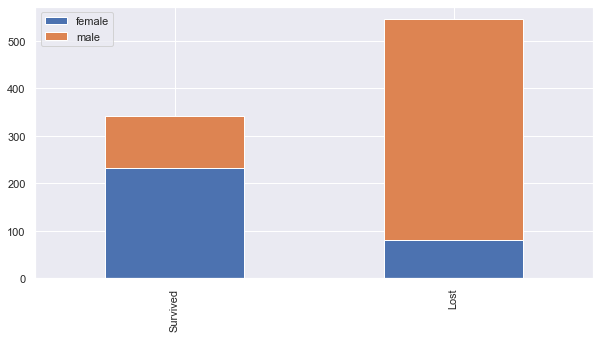

In [70]:
male_female_survival = read.groupby('Sex').sum()['Survived']
print("1..Sevived By SEX:\n ", male_female_survival)

def bar_chart(feature):
    survived = read[read['Survived']==1][feature].value_counts()
    lost = read[read['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, lost])
    df.index = ['Survived','Lost']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

    
bar_chart('Sex')
print("Survived :\n",read[read['Survived']==1]['Sex'].value_counts())
print("Lost:\n",read[read['Survived']==0]['Sex'].value_counts())


As per the Chart confirms that Women are more survivied than Men.

# 2.Lost vs survived by class.

2...lost_survival_class:
  Sex
female     678
male      1367
Name: Pclass, dtype: int64
Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Lost:
 3    368
2     97
1     80
Name: Pclass, dtype: int64


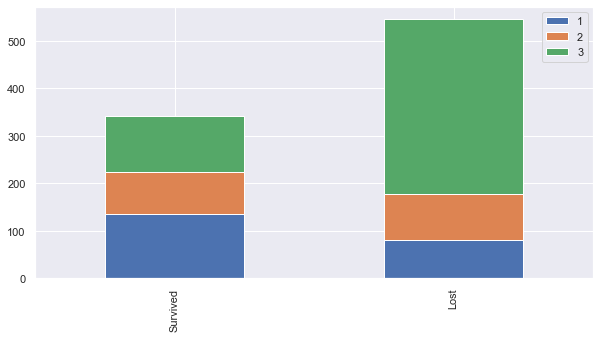

In [71]:
lost_survival_class = read.groupby('Sex').sum()['Pclass']
print("2...lost_survival_class:\n ", lost_survival_class)

def bar_chart(feature):
    survived = read[read['Survived']==1][feature].value_counts()
    lost = read[read['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, lost])
    df.index = ['Survived','Lost']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

    
bar_chart('Pclass')
print("Survived :\n",read[read['Survived']==1]['Pclass'].value_counts())
print("Lost:\n",read[read['Survived']==0]['Pclass'].value_counts())



The Chart confirms 1st class more likely survivied than other classes.
The Chart confirms 2nd class does not much diffrenece
The Chart confirms 3rd class more likely dead than other classes

# 3.Calculate the conditional probability that a person survives given their sex and passenger-class.

In [72]:
sex_class_probability = male_female_survival/lost_survival_class
print(sex_class_probability)



Sex
female    0.343658
male      0.079737
dtype: float64


We can the sex_class_probability for female is 0.343658 and male is 0.079737

Parents/Children Aboard :
 0    233
1     65
2     40
3      3
5      1
Name: Parents/Children Aboard, dtype: int64
Parents/Children Aboard:
 0    441
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parents/Children Aboard, dtype: int64
Siblings/Spouses Aboard :
 0    210
1    112
2     13
3      4
4      3
Name: Siblings/Spouses Aboard, dtype: int64
Siblings/Spouses Aboard:
 0    394
1     97
4     15
2     15
3     12
8      7
5      5
Name: Siblings/Spouses Aboard, dtype: int64


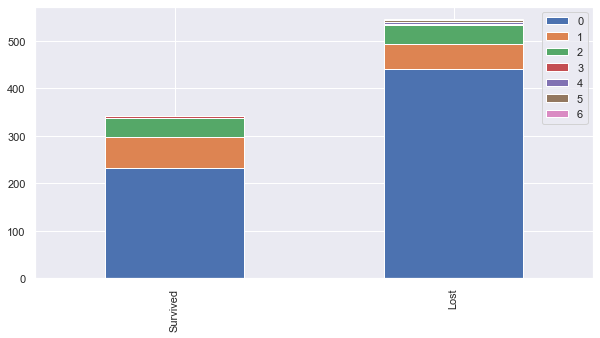

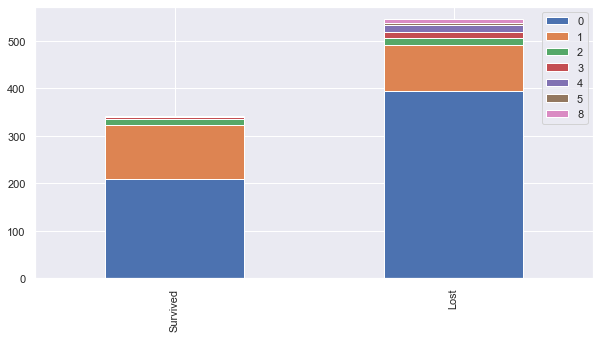

In [73]:

bar_chart('Parents/Children Aboard')
print("Parents/Children Aboard :\n",read[read['Survived']==1]['Parents/Children Aboard'].value_counts())
print("Parents/Children Aboard:\n",read[read['Survived']==0]['Parents/Children Aboard'].value_counts())

bar_chart('Siblings/Spouses Aboard')
print("Siblings/Spouses Aboard :\n",read[read['Survived']==1]['Siblings/Spouses Aboard'].value_counts())
print("Siblings/Spouses Aboard:\n",read[read['Survived']==0]['Siblings/Spouses Aboard'].value_counts())




